# Latar Belakang

Airbnb adalah layanan online yang memungkinkan pengguna untuk menyewa atau menawarkan penginapan, seperti rumah atau apartemen, untuk jangka pendek. Layanan ini dimulai pada tahun 2008 dan sekarang telah digunakan oleh jutaan tuan rumah dan tamu di seluruh dunia. 

Pengguna dapat mencari penginapan menggunakan berbagai filter, seperti jenis penginapan, tanggal, lokasi, dan harga. Tuan rumah dapat menetapkan harga dan detail lainnya untuk daftar sewa mereka. Selain itu, Airbnb juga menyediakan pengalaman pariwisata yang diadakan oleh pakar lokal.

Sebagai imbalan atas layanan ini, Airbnb menerima komisi dari setiap pemesanan. Harap dicatat bahwa beberapa kota memiliki batasan untuk penyewaan jangka pendek dan tuan rumah mungkin perlu mendaftar dengan pemerintah dan memperoleh izin atau lisensi.

# Rumusan Masalah

1. Bagaimana distribusi harga antara berbagai jenis akomodasi (rumah/apartemen pribadi, kamar pribadi, kamar bersama, hotel) di berbagai lingkungan di Bangkok? Apakah ada korelasi antara harga dan jenis akomodasi atau lokasi?

2. Apakah ada hubungan antara jumlah ulasan dan harga atau jenis akomodasi? Apakah akomodasi dengan harga lebih tinggi mendapatkan lebih banyak ulasan?

3. Bagaimana pola ketersediaan akomodasi sepanjang tahun? Apakah ada musim tertentu di mana akomodasi lebih banyak tersedia atau lebih sedikit?

4. Apakah tuan rumah dengan lebih banyak daftar memiliki ulasan yang lebih baik? Apakah mereka cenderung menyewakan jenis akomodasi tertentu?

5. Bagaimana distribusi akomodasi di berbagai lingkungan di Bangkok? Apakah ada lingkungan tertentu yang populer di antara tuan rumah?

# Tujuan

1. Tujuan bisa berupa memahami lebih baik tentang faktor-faktor yang mempengaruhi harga akomodasi Airbnb di Bangkok. Ini bisa membantu tuan rumah menetapkan harga yang kompetitif dan membantu tamu menemukan penawaran terbaik.

2. Tujuan bisa berupa mengeksplorasi hubungan antara ulasan dan faktor lain seperti harga atau jenis akomodasi. Ini bisa memberikan wawasan tentang apa yang membuat akomodasi mendapatkan ulasan positif.

3. Tujuan bisa berupa memahami pola ketersediaan akomodasi sepanjang tahun. Ini bisa membantu dalam merencanakan strategi pemasaran atau penentuan harga berdasarkan permintaan dan penawaran.

4. Tujuan bisa berupa memahami strategi tuan rumah yang sukses dalam mengelola beberapa daftar. Ini bisa memberikan wawasan tentang bagaimana menjadi tuan rumah yang sukses di Airbnb.

5. Tujuan bisa berupa memahami preferensi lokasi tuan rumah dan tamu. Ini bisa membantu dalam membuat keputusan tentang di mana menawarkan atau mencari akomodasi.

# Data Preparation

`Pengecekan data dan statistik`

In [78]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file csv
data = pd.read_csv('Airbnb Listings Bangkok.csv')  # Ganti 'your_file.csv' dengan nama file Anda

`Pemeriksaan Awal`

In [79]:
# Lihat 5 baris pertama data
print('_'*80,'\n')
print(' '*30,'5 BARIS PERTAMA DATA')
print('_'*80,'\n')
print(data.head())
print('_'*80,'\n')

# Lihat informasi data
print(' '*30,'INFORMASI DATA')
print('_'*80,'\n')
print(data.info())
print('_'*80,'\n')



________________________________________________________________________________ 

                               5 BARIS PERTAMA DATA
________________________________________________________________________________ 

   Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din 

`Eksplorasi Data`

In [80]:
# Lihat statistik deskriptif data
print(' '*30,'DESKRIPSI DATA')
print('_'*80,'\n')
print(data.describe())
print('_'*80,'\n')


                               DESKRIPSI DATA
________________________________________________________________________________ 

         Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       10064.000000   
mean 

`Pembersihan Data`

In [81]:
# Cek apakah ada nilai yang hilang
print(' '*30,'PENGECEKAN DATA NULL')
print('_'*80,'\n')
print(data.isnull().sum())
print('_'*80,'\n')

from sklearn.impute import SimpleImputer

# Inisialisasi imputer dengan strategi yang sesuai
imputer_constant = SimpleImputer(strategy='constant', fill_value='Unknown')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
imputer_mean = SimpleImputer(strategy='mean')

# Tentukan kolom yang ingin diimputasi
columns_constant = ['name', 'host_name']
columns_most_frequent = ['last_review', 'reviews_per_month']

# Imputasi nilai null
data[columns_constant] = imputer_constant.fit_transform(data[columns_constant])
data[columns_most_frequent] = imputer_most_frequent.fit_transform(data[columns_most_frequent])
data['reviews_per_month'] = imputer_mean.fit_transform(data[['reviews_per_month']])

# Cek apakah masih ada nilai null
print(data.isnull().sum())


                               PENGECEKAN DATA NULL
________________________________________________________________________________ 

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64
________________________________________________________________________________ 

Unnamed: 0                        0
id                                0
name                              

`Visualisasi Data`

                     VISUALISASI DATA MENGGUNAKAN HISTOGRAM
________________________________________________________________________________ 



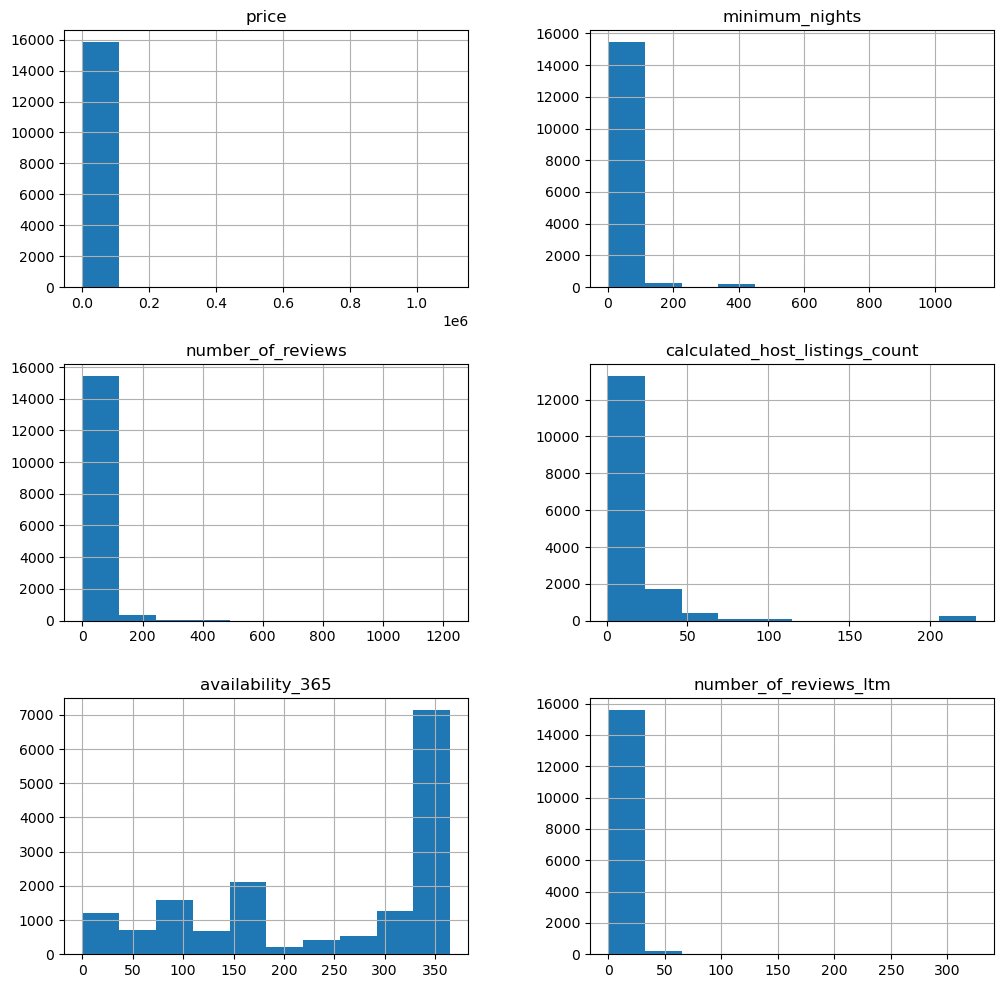

________________________________________________________________________________ 

                     VISUALISASI DATA UNTUK MELIHAT OUTLIER
________________________________________________________________________________ 



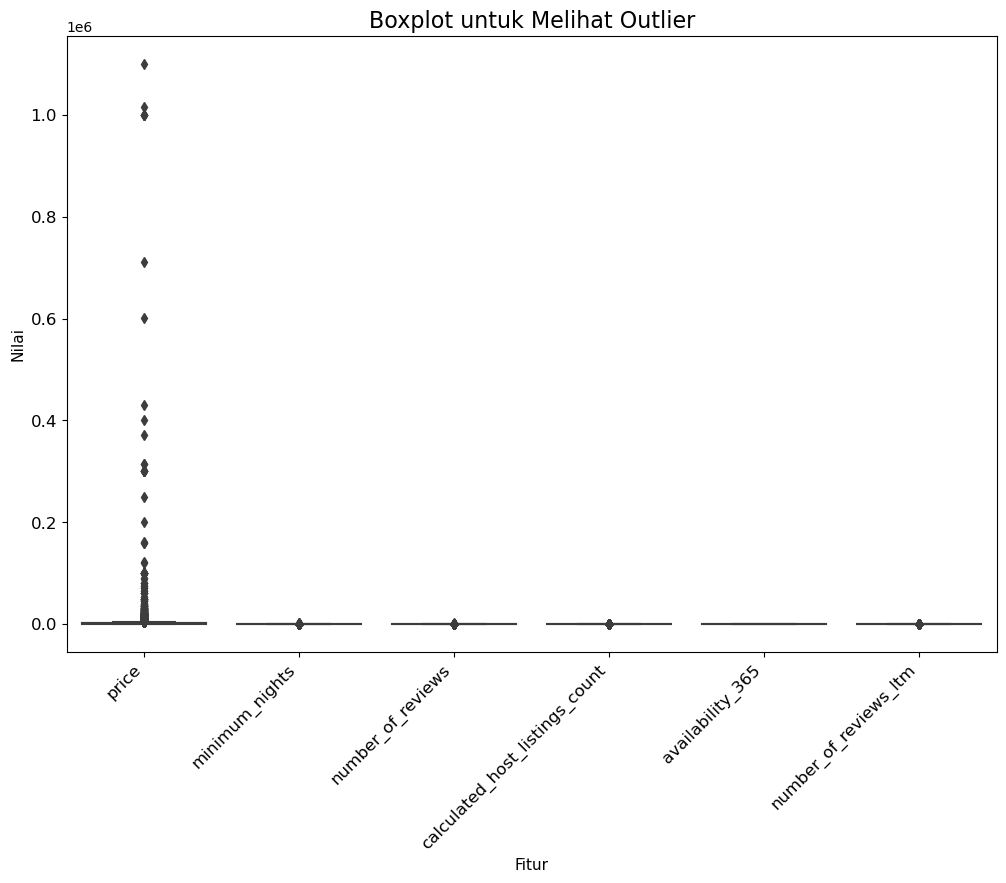

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom-kolom yang ingin di-plot pada histogram
selected_columns_hist = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

# Visualisasi data menggunakan histogram
print(' '*20, 'VISUALISASI DATA MENGGUNAKAN HISTOGRAM')
print('_'*80, '\n')
data[selected_columns_hist].hist(figsize=(12, 12))
plt.show()
print('_'*80, '\n')

# Pilih kolom-kolom yang ingin di-plot pada boxplot
selected_columns_boxplot = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

# Visualisasi data menggunakan boxplot untuk melihat outlier
print(' '*20, 'VISUALISASI DATA UNTUK MELIHAT OUTLIER')
print('_'*80, '\n')
plt.figure(figsize=(12, 8))
# Gunakan boxplot dengan seaborn
sns.boxplot(data=data[selected_columns_boxplot])

# Atur label dan judul
plt.title('Boxplot untuk Melihat Outlier', fontsize=16)
plt.xlabel('Fitur', fontsize=11)
plt.ylabel('Nilai', fontsize=11)

# Atur yticks agar terlihat lebih jelas
plt.yticks(fontsize=12)

# Atur xticks agar tidak bertumpuk
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()


# Data Analysis

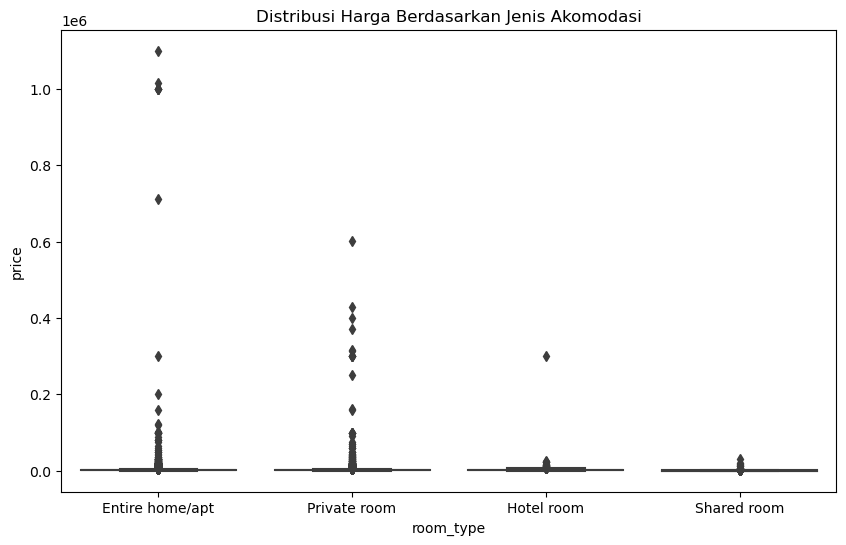

In [83]:
# Bagaimana distribusi harga antara berbagai jenis akomodasi di berbagai lingkungan di Bangkok?
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Distribusi Harga Berdasarkan Jenis Akomodasi')
plt.show()

In [84]:
# Apakah ada korelasi antara harga dan jenis akomodasi atau lokasi?
# Kita perlu mengubah variabel kategorikal menjadi numerik untuk menghitung korelasi
data['room_type_num'] = data['room_type'].astype('category').cat.codes
correlation = data[['price', 'room_type_num']].corr()
print(correlation)


                  price  room_type_num
price          1.000000      -0.013607
room_type_num -0.013607       1.000000


Nilai korelasi antara price dan room_type_num adalah -0.011911.
Nilai ini mendekati 0, yang mengindikasikan bahwa tidak ada hubungan
linier yang signifikan antara price dan room_type_num. 
Korelasi yang mendekati 0 menunjukkan bahwa perubahan dalam satu variabel tidak secara linier mempengaruhi perubahan dalam variabel lainnya.
Dengan demikian, dalam konteks ini, tidak ada hubungan linier yang kuat antara harga (price) dan jenis kamar (room_type_num)

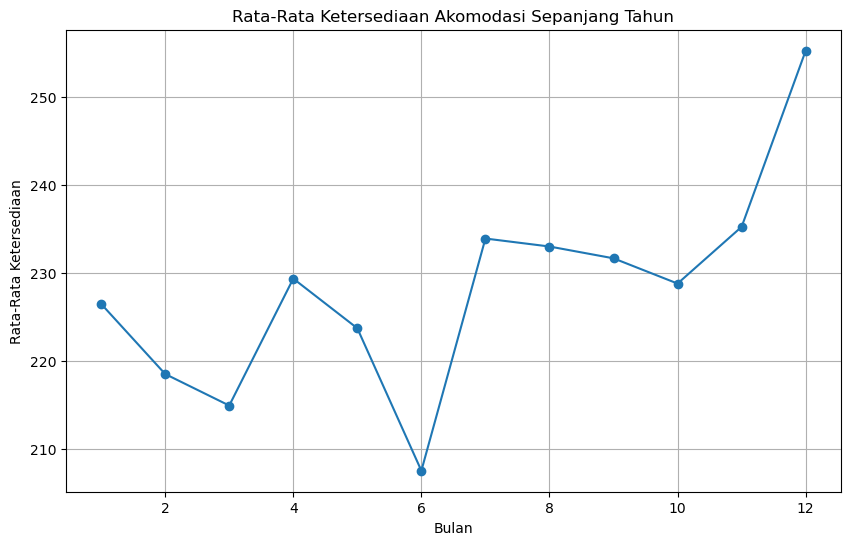

In [85]:
#Pola Ketersediaan Akomodasi Sepanjang Tahun
#perlu memiliki data tanggal, membuat kolom baru untuk bulan dan menghitung rata-rata ketersediaan per bulan.

data['month'] = pd.DatetimeIndex(data['last_review']).month
avg_availability = data.groupby('month')['availability_365'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_availability.index, avg_availability.values, marker='o')
plt.title('Rata-Rata Ketersediaan Akomodasi Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Ketersediaan')
plt.grid(True)
plt.show()


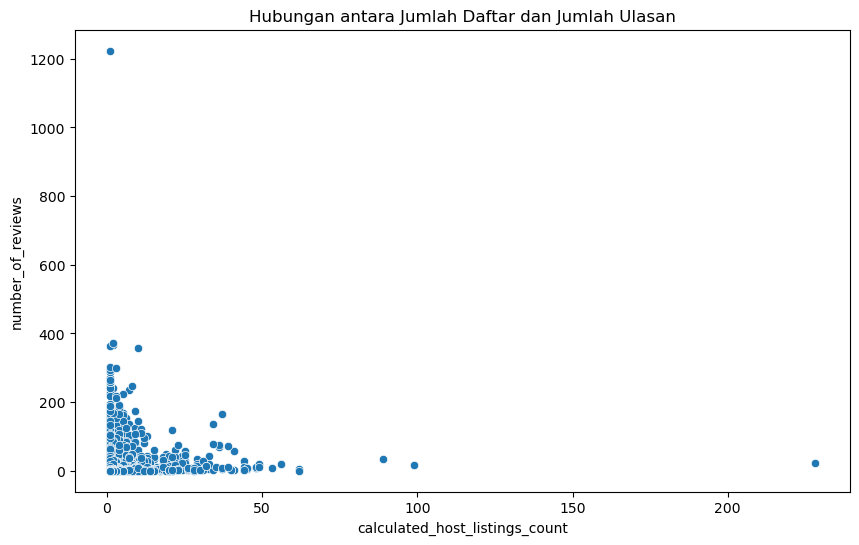

In [86]:
#Hubungan antara Jumlah Daftar dan Jumlah Ulasan
#Untuk melihat apakah pemilik dengan lebih banyak tempat memiliki ulasan yang lebih baik, kita dapat membuat scatterplot antara jumlah daftar dan jumlah ulasan. Ini memberikan gambaran tentang seberapa baik tuan rumah dengan banyak daftar menerima ulasan.

grouped_data = data.groupby('host_id').agg({'calculated_host_listings_count': 'first', 'number_of_reviews': 'mean'})
plt.figure(figsize=(10,6))
sns.scatterplot(x='calculated_host_listings_count', y='number_of_reviews', data=grouped_data)
plt.title('Hubungan antara Jumlah Daftar dan Jumlah Ulasan')
plt.show()


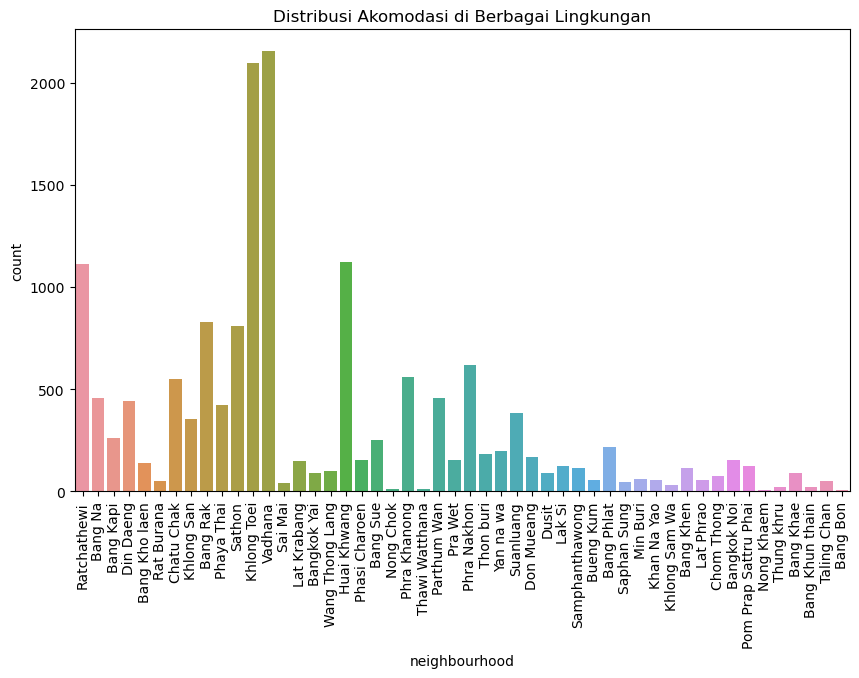

In [87]:
# Bagaimana distribusi akomodasi di berbagai lingkungan di Bangkok?
plt.figure(figsize=(10,6))
sns.countplot(x='neighbourhood', data=data)
plt.title('Distribusi Akomodasi di Berbagai Lingkungan')
plt.xticks(rotation=90)
plt.show()

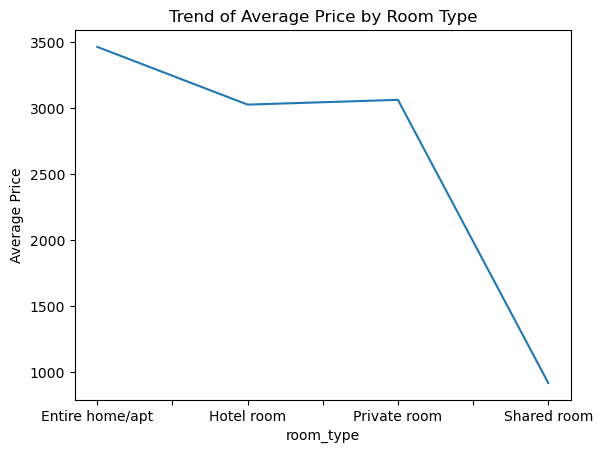

In [88]:
# Plot tren harga rata-rata berdasarkan jenis kamar
data.groupby('room_type')['price'].mean().plot()
plt.ylabel('Average Price')
plt.title('Trend of Average Price by Room Type')
plt.show()

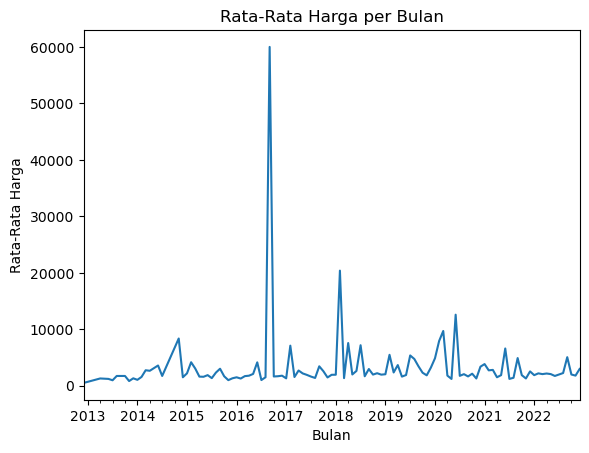

In [89]:
#Rata-Rata Harga per Bulan
#Menganalisis rata-rata harga per bulan dapat membantu kita memahami pola musiman dalam harga.

data['last_review'] = pd.to_datetime(data['last_review'])
avg_price_per_month = data.groupby(data['last_review'].dt.to_period('M'))['price'].mean()

avg_price_per_month.plot(kind='line')
plt.title('Rata-Rata Harga per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Harga')
plt.show()
